In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix

import joblib

LOAD THE DATASET

In [44]:
#load the csv file
data = pd.read_csv('Credit_Score_Clean.csv').drop_duplicates()
data.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,5,4,6.27,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
1,23,Scientist,19114.12,3,4,3,4,6,0,11.27,...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269
2,23,Scientist,19114.12,3,4,3,4,3,8,11.27,...,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271
3,23,Scientist,19114.12,3,4,3,4,3,6,11.27,...,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,0
4,28,Teacher,34847.84,2,4,6,1,7,1,7.42,...,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,320


EXPLORATORY DATA ANALYSIS AND DATA CLEANING

In [45]:
#exploratory data analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31711 entries, 0 to 31710
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        31711 non-null  int64  
 1   Occupation                 31711 non-null  object 
 2   Annual_Income              31711 non-null  float64
 3   Num_Bank_Accounts          31711 non-null  int64  
 4   Num_Credit_Card            31711 non-null  int64  
 5   Interest_Rate              31711 non-null  int64  
 6   Num_of_Loan                31711 non-null  int64  
 7   Delay_from_due_date        31711 non-null  int64  
 8   Num_of_Delayed_Payment     31711 non-null  int64  
 9   Changed_Credit_Limit       31711 non-null  float64
 10  Num_Credit_Inquiries       31711 non-null  float64
 11  Credit_Mix                 31711 non-null  object 
 12  Outstanding_Debt           31711 non-null  float64
 13  Credit_Utilization_Ratio   31711 non-null  flo

In [46]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,31711.0,NaN,NaN,NaN,35.135032,11.037186,14.0,26.0,35.0,44.0,56.0
Occupation,31711,15,Lawyer,2401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,31711.0,NaN,NaN,NaN,174904.514631,1415576.966246,7006.52,22118.105,36993.94,74520.615,24198062.0
Num_Bank_Accounts,31711.0,NaN,NaN,NaN,4.415818,2.305062,0.0,3.0,4.0,6.0,10.0
Num_Credit_Card,31711.0,NaN,NaN,NaN,4.801583,1.673844,0.0,4.0,5.0,6.0,10.0
Interest_Rate,31711.0,NaN,NaN,NaN,10.256504,5.916633,1.0,6.0,9.0,14.0,34.0
Num_of_Loan,31711.0,NaN,NaN,NaN,2.234114,1.700965,0.0,1.0,2.0,3.0,9.0
Delay_from_due_date,31711.0,NaN,NaN,NaN,14.985967,9.353937,0.0,8.0,13.0,22.0,60.0
Num_of_Delayed_Payment,31711.0,NaN,NaN,NaN,26.493299,215.388313,0.0,6.0,11.0,15.0,4397.0
Changed_Credit_Limit,31711.0,NaN,NaN,NaN,8.60182,5.119076,0.0,4.55,8.37,11.62,26.9


In [47]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    19730
Good         7551
Poor         4430
Name: count, dtype: int64

In [48]:
data.shape

(31711, 21)

In [49]:
#check for null values
data.isna().sum()

Age                          0
Occupation                   0
Annual_Income                0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64

In [50]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
31706    False
31707    False
31708    False
31709    False
31710    False
Length: 31711, dtype: bool

In [51]:
data.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Credit_History_Age_Months'],
      dtype='object')

In [ ]:
Distribution of the Numerical columns

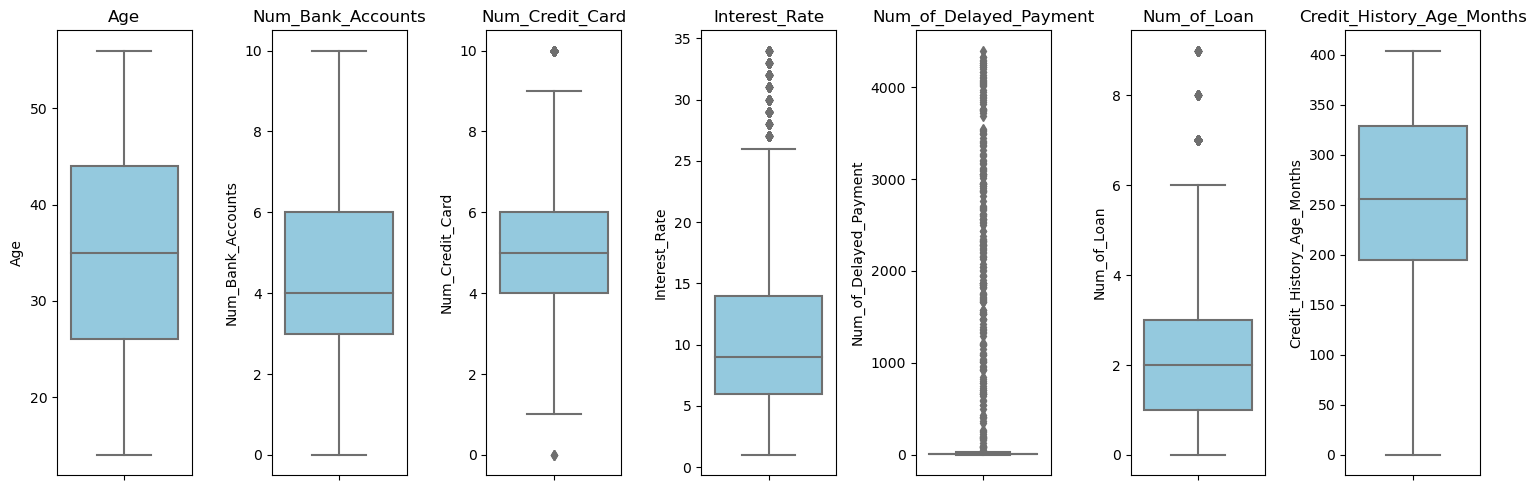

In [52]:
plt.figure(figsize=(15,5))
for i, col in enumerate(['Age', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Delayed_Payment', 'Num_of_Loan', 'Credit_History_Age_Months']):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=data[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

DATA VISUALIZATIONS


Text(0, 0.5, 'Proportion')

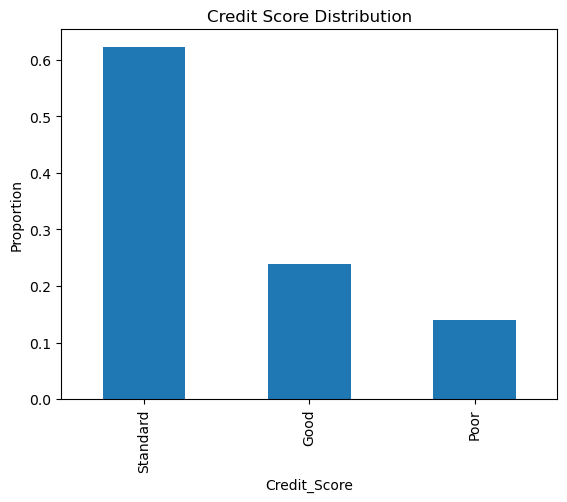

In [53]:
data['Credit_Score'].value_counts(normalize=True).plot(kind='bar')
plt.title('Credit Score Distribution')
plt.ylabel('Proportion')

Text(0, 0.5, 'Proportion')

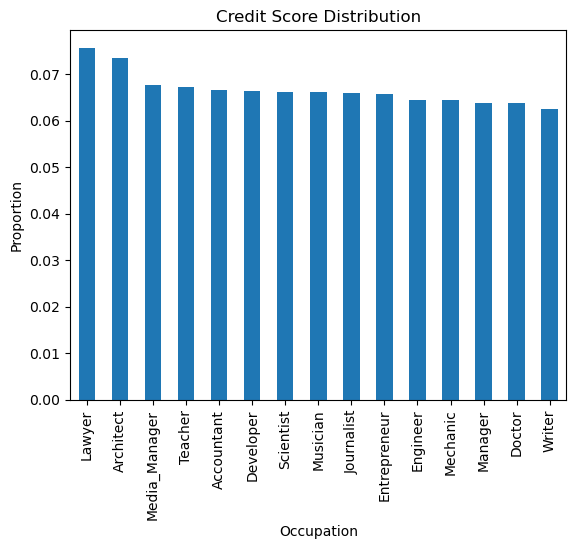

In [54]:
data['Occupation'].value_counts(normalize=True).plot(kind='bar')
plt.title('Credit Score Distribution')
plt.ylabel('Proportion')

Text(0, 0.5, 'Proportion')

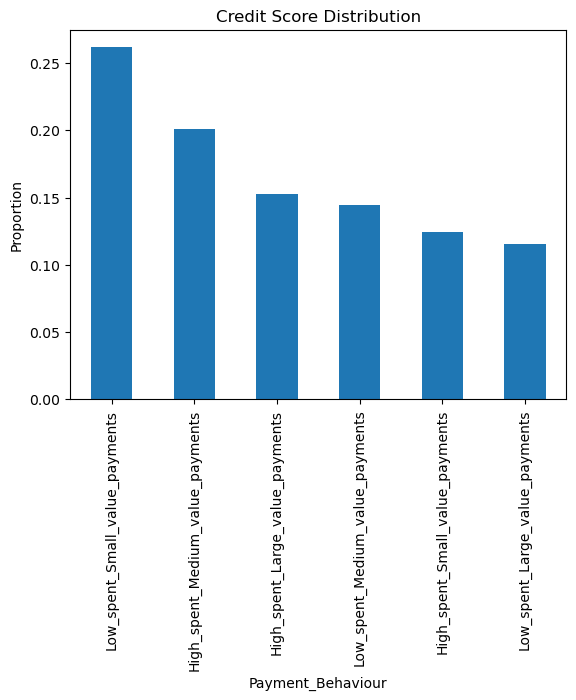

In [55]:
data['Payment_Behaviour'].value_counts(normalize=True).plot(kind='bar')
plt.title('Credit Score Distribution')
plt.ylabel('Proportion')

In [57]:
target = "Credit_Score"
categorical_features = ['Occupation','Credit_Mix','Payment_Behaviour', 'Payment_of_Min_Amount']
numerical_features = [col for col in data.columns if col not in categorical_features + [target]]


In [58]:
# Preprocessing
#encode the target variable column
label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])

#encode the categorical columns
encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col]=le.fit_transform(data[col])
    encoders[col]=le
    joblib.dump(le, f"{col.lower()}_encoder.pkl")

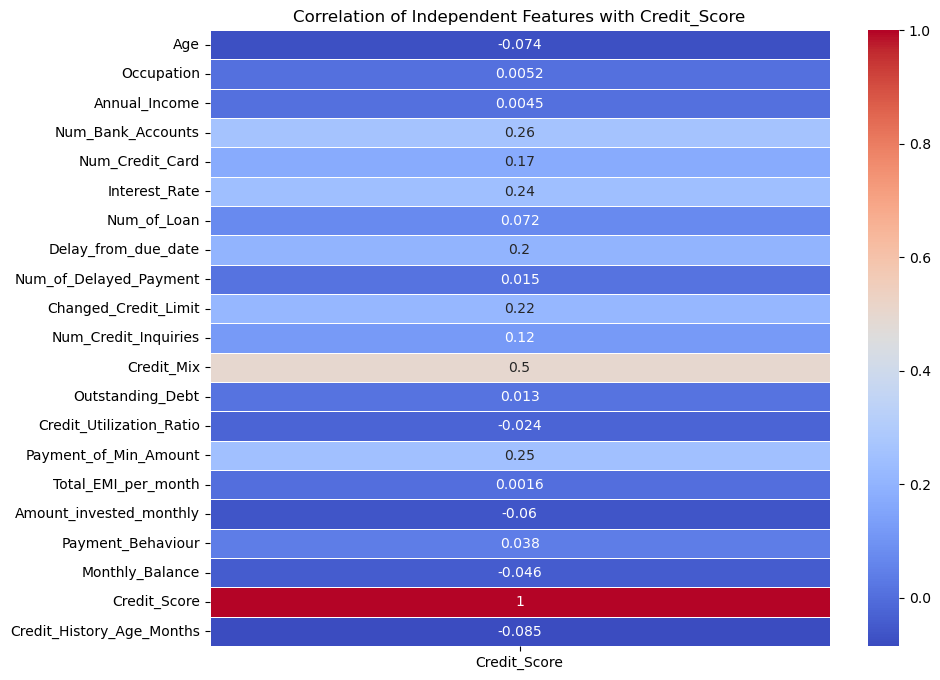

In [62]:
numerical_data= data.select_dtypes(include='number')
corr_matrix = numerical_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix[['Credit_Score']], annot=True, cmap='coolwarm', linewidths='0.5')
plt.title("Correlation of Independent Features with Credit_Score")
plt.show()

TRAIN, TEST AND SPLIT OF THE DATASET

In [66]:
y = data[target]
X = data.drop(target, axis=1)
X = pd.get_dummies(X)
joblib.dump(X.columns.tolist(), "model_columns.pkl")

scaler = StandardScaler()
X = scaler.fit_transform(X)

joblib.dump(scaler, "standard_scaler.pkl")

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

MODEL TRAINING AND EVALUATION

In [67]:
#since we are dealing with cassification of the dependent varibale as credit score we use the classifiers
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

print("Models used in training the Credit Scoring Model:")
for name in models.keys():
    print(f" - {name}")

for name, model in models.items():
  print(f"\n\nModel: {name}")
  model.fit(X_train, y_train)
  ypredict = model.predict(X_test)
  joblib.dump(model, f'{name.lower().replace(" ", "_")}_model.pkl')

  if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test)
    try:
        roc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        print(f"\n📈 ROC AUC Score: {roc:.4f}")
    except ValueError as e:
        print(f"⚠️ ROC AUC Error: {e}")
  else:
    print("⚠️ ROC AUC not available (model doesn't support predict_proba)")
    
  # Accuracy & classification
  acc = accuracy_score(y_test, ypredict)
  print(f"✅ Accuracy: {acc:.4f}")
  
  print("📊 Classification Report:")
  print(classification_report(y_test, ypredict, target_names=label_encoder.classes_))
  
  print("🧮 Confusion Matrix:")
  print(confusion_matrix(y_test, ypredict))


Models used in training the Credit Scoring Model:
 - Logistic Regression
 - Decision Tree
 - Random Forest


Model: Logistic Regression

📈 ROC AUC Score: 0.8052
✅ Accuracy: 0.6913
📊 Classification Report:
              precision    recall  f1-score   support

        Good       0.55      0.73      0.63      1510
        Poor       0.41      0.50      0.45       886
    Standard       0.88      0.72      0.79      3947

    accuracy                           0.69      6343
   macro avg       0.61      0.65      0.62      6343
weighted avg       0.73      0.69      0.70      6343

🧮 Confusion Matrix:
[[1106  215  189]
 [ 228  447  211]
 [ 692  423 2832]]


Model: Decision Tree

📈 ROC AUC Score: 0.7228
✅ Accuracy: 0.6994
📊 Classification Report:
              precision    recall  f1-score   support

        Good       0.60      0.59      0.59      1510
        Poor       0.52      0.54      0.53       886
    Standard       0.78      0.78      0.78      3947

    accuracy                 